In [ ]:
import pandas as pd

flight_delays = pd.read_csv(r'/content/aa-delays-2023 (1).csv',sep=',')
flight_delays.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,NaN


Print features

In [ ]:
flight_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              2836 non-null   object 
 1   OP_CARRIER           2836 non-null   object 
 2   OP_CARRIER_FL_NUM    2836 non-null   int64  
 3   ORIGIN               2836 non-null   object 
 4   DEST                 2836 non-null   object 
 5   CRS_DEP_TIME         2836 non-null   int64  
 6   DEP_TIME             2836 non-null   float64
 7   DEP_DELAY            2836 non-null   float64
 8   TAXI_OUT             2836 non-null   float64
 9   WHEELS_OFF           2836 non-null   float64
 10  WHEELS_ON            2836 non-null   float64
 11  TAXI_IN              2836 non-null   float64
 12  CRS_ARR_TIME         2836 non-null   int64  
 13  ARR_TIME             2836 non-null   float64
 14  ARR_DELAY            2836 non-null   float64
 15  CANCELLED            2836 non-null   f

 Influence of WEATHER_DELAY on ARR_DELAY

In [ ]:
flight_delays[['WEATHER_DELAY','ARR_DELAY']].corr()['ARR_DELAY'][:]

WEATHER_DELAY    0.340569
ARR_DELAY        1.000000
Name: ARR_DELAY, dtype: float64

In [ ]:
object_columns = flight_delays.select_dtypes(include=['object']).columns

In [ ]:
object_columns

Index(['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE'], dtype='object')

In [ ]:
y=flight_delays['ARR_DELAY']
x=flight_delays.drop(object_columns,axis=1).copy()
x=x.drop(['ARR_DELAY'],axis=1).copy()

In [ ]:
y

0      -23.0
1      -24.0
2      -13.0
3       -2.0
4       14.0
        ... 
2831    44.0
2832    -7.0
2833    -9.0
2834    -6.0
2835    50.0
Name: ARR_DELAY, Length: 2836, dtype: float64

In [ ]:
x

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2429,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,...,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2427,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,...,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2426,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,...,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2425,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,...,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2424,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,...,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,657,713,743.0,30.0,25.0,808.0,1047.0,6.0,1009,1053.0,...,176.0,190.0,159.0,1062.0,0.0,30.0,14.0,0.0,0.0,NaN
2832,658,2016,2017.0,1.0,20.0,2037.0,2259.0,8.0,2314,2307.0,...,178.0,170.0,142.0,1062.0,0.0,0.0,0.0,0.0,0.0,NaN
2833,660,1630,1621.0,-9.0,18.0,1639.0,1730.0,10.0,1749,1740.0,...,79.0,79.0,51.0,280.0,0.0,0.0,0.0,0.0,0.0,NaN
2834,665,750,756.0,6.0,16.0,812.0,1126.0,4.0,1136,1130.0,...,226.0,214.0,194.0,1249.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
y = y.apply(lambda x: 0 if x <= 15 else 1)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2831    1
2832    0
2833    0
2834    0
2835    1
Name: ARR_DELAY, Length: 2836, dtype: int64

Correlation between features and the target ARR_DELAY

In [ ]:
corr = x.corr()

In [ ]:
x=flight_delays.drop(object_columns,axis=1).copy()


In [ ]:
x['ARR_DELAY'] = x['ARR_DELAY'].apply(lambda x: 0 if x <= 15 else 1)

In [ ]:
corr = x.corr()

In [ ]:
print(abs(corr['ARR_DELAY'].sort_values(ascending=False)))

ARR_DELAY              1.000000
DEP_DELAY              0.660947
LATE_AIRCRAFT_DELAY    0.471861
CARRIER_DELAY          0.431354
NAS_DELAY              0.380455
TAXI_OUT               0.251755
WEATHER_DELAY          0.189152
TAXI_IN                0.124396
WHEELS_OFF             0.104222
DEP_TIME               0.089070
CRS_ARR_TIME           0.037413
SECURITY_DELAY         0.036762
CRS_DEP_TIME           0.021335
WHEELS_ON              0.011970
ARR_TIME               0.005933
ACTUAL_ELAPSED_TIME    0.001389
OP_CARRIER_FL_NUM      0.005944
DIVERTED               0.027173
CANCELLED              0.030391
AIR_TIME               0.037697
CRS_ELAPSED_TIME       0.048538
DISTANCE               0.055354
Unnamed: 27                 NaN
Name: ARR_DELAY, dtype: float64


In [ ]:
from scipy import stats

In [ ]:
flight_delays['ARR_DELAY'],

(0      -23.0
 1      -24.0
 2      -13.0
 3       -2.0
 4       14.0
         ... 
 2831    44.0
 2832    -7.0
 2833    -9.0
 2834    -6.0
 2835    50.0
 Name: ARR_DELAY, Length: 2836, dtype: float64,)

Normal Distribution of the feature ARR_DELAY

In [ ]:
#X=x.drop(['ARR_DELAY'],axis=1).copy()
NormResult = stats.kstest(flight_delays['ARR_DELAY'],stats.norm.cdf)

In [ ]:
NormResult

KstestResult(statistic=0.5910337408964376, pvalue=0.0, statistic_location=-3.0, statistic_sign=1)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.05910337, 0.11820675, 0.17731012, 0.2364135 ,
        0.29551687, 0.35462024, 0.41372362, 0.47282699, 0.53193037,
        0.59103374]),
 <BarContainer object of 10 artists>)

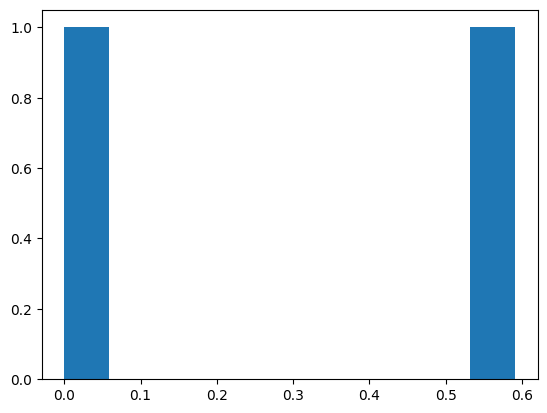

In [ ]:
import matplotlib.pyplot as plt
plt.hist(NormResult)

Nonlinear transformation

In [ ]:
import numpy as np
y = np.log(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.07930183, 0.15860367, 0.2379055 , 0.31720733,
        0.39650917, 0.475811  , 0.55511283, 0.63441467, 0.7137165 ,
        0.79301834]),
 <BarContainer object of 10 artists>)

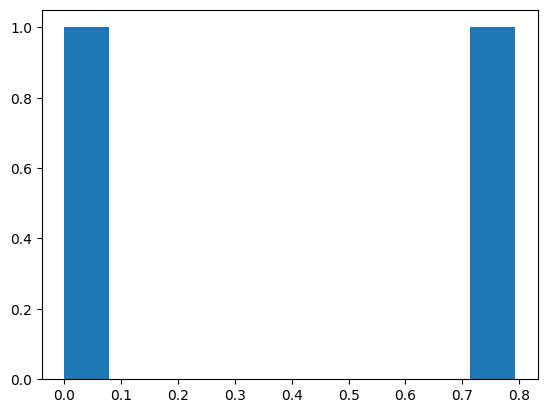

In [ ]:
NormResult2 = stats.kstest(y,stats.norm.cdf)
plt.hist(NormResult2)

In [ ]:
x=x.drop('ARR_DELAY',axis=1).copy()

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OP_CARRIER_FL_NUM    2836 non-null   int64  
 1   CRS_DEP_TIME         2836 non-null   int64  
 2   DEP_TIME             2836 non-null   float64
 3   DEP_DELAY            2836 non-null   float64
 4   TAXI_OUT             2836 non-null   float64
 5   WHEELS_OFF           2836 non-null   float64
 6   WHEELS_ON            2836 non-null   float64
 7   TAXI_IN              2836 non-null   float64
 8   CRS_ARR_TIME         2836 non-null   int64  
 9   ARR_TIME             2836 non-null   float64
 10  CANCELLED            2836 non-null   float64
 11  DIVERTED             2836 non-null   float64
 12  CRS_ELAPSED_TIME     2836 non-null   float64
 13  ACTUAL_ELAPSED_TIME  2836 non-null   float64
 14  AIR_TIME             2836 non-null   float64
 15  DISTANCE             2836 non-null   f

In [ ]:
y=flight_delays['ARR_DELAY'].apply(lambda x: 0 if x <= 15 else 1)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2831    1
2832    0
2833    0
2834    0
2835    1
Name: ARR_DELAY, Length: 2836, dtype: int64

In [ ]:
x=x.drop('Unnamed: 27',axis=1).copy()

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OP_CARRIER_FL_NUM    2836 non-null   int64  
 1   CRS_DEP_TIME         2836 non-null   int64  
 2   DEP_TIME             2836 non-null   float64
 3   DEP_DELAY            2836 non-null   float64
 4   TAXI_OUT             2836 non-null   float64
 5   WHEELS_OFF           2836 non-null   float64
 6   WHEELS_ON            2836 non-null   float64
 7   TAXI_IN              2836 non-null   float64
 8   CRS_ARR_TIME         2836 non-null   int64  
 9   ARR_TIME             2836 non-null   float64
 10  CANCELLED            2836 non-null   float64
 11  DIVERTED             2836 non-null   float64
 12  CRS_ELAPSED_TIME     2836 non-null   float64
 13  ACTUAL_ELAPSED_TIME  2836 non-null   float64
 14  AIR_TIME             2836 non-null   float64
 15  DISTANCE             2836 non-null   f

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2836 entries, 0 to 2835
Series name: ARR_DELAY
Non-Null Count  Dtype
--------------  -----
2836 non-null   int64
dtypes: int64(1)
memory usage: 22.3 KB


 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_train, y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

print("r-squared DecisionTreeRegressor error on training set {:.2f}".format(r2_score(y_train,y_train_predict)))
print("r-squared DecisionTreeRegressor error on testing set {:.2f}".format(r2_score(y_test,y_test_predict)))
print("mean squared DecisionTreeRegressor error on training set {:.2f}".format(MSE(y_train,y_train_predict)))
print("mean squared DecisionTreeRegressor error on testing set {:.2f}".format(MSE(y_test,y_test_predict)))


r-squared DecisionTreeRegressor error on training set 1.00
r-squared DecisionTreeRegressor error on testing set 0.85
mean squared DecisionTreeRegressor error on training set 0.00
mean squared DecisionTreeRegressor error on testing set 0.03


Mean squared error and R2

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE

def evaluate_model(model ,X_train ,X_test ,y_train ,y_test):
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    train_mae = MAE(y_train, train_y_pred)
    train_mse = MSE(y_train, train_y_pred)
    train_rmse= np.sqrt(train_mse)
    train_r2 = r2_score(y_train,train_y_pred)
    test_mae = MAE(y_test, test_y_pred)
    test_mse = MSE(y_test, test_y_pred)
    test_rmse= np.sqrt(test_mse)
    test_r2 = r2_score(y_test,test_y_pred)

    report = f'----------\nTrain MAE : {train_mae} ,Train MSE : {train_mse} ,Train RMSE : {train_rmse},Train R2 : {train_r2}\nTest MAE : {test_mae} ,Test MSE : {test_mse}  ,Test RMSE : {test_rmse},Test R2: {test_r2}\n----------'
    return report ,train_y_pred ,test_y_pred

AUC,Recall and F1 score

In [ ]:
from sklearn import metrics
def evaluate_model_class(model ,X_train ,X_test ,y_train ,y_test):
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, train_y_pred)
    accuracy_test = metrics.accuracy_score(y_test, test_y_pred)
    recall_train = metrics.recall_score(y_train, train_y_pred)
    recall_test = metrics.recall_score(y_test, test_y_pred)
    f1_train = metrics.f1_score(y_train, train_y_pred)
    f1_test = metrics.f1_score(y_test, test_y_pred)
    report = f'----------\nTrain accuracy : {accuracy_train} ,Train recall : {recall_train} ,Train F1 : {f1_train}\nTest accuracy : {accuracy_test} ,Test recall : {recall_test}  ,Test F1 : {f1_test}\n----------'
    return report ,train_y_pred ,test_y_pred

Regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
models = [
            [('model',  MLPRegressor())] ,
            [('model', LinearRegression())],
            [('model', DecisionTreeRegressor(min_samples_split=3))]
        ]

In [ ]:
reg_models = {
#Generalized Linear Models (GLMs)
'linear':{'model': LinearRegression()},
#Trees
'decision_tree':{'model': DecisionTreeRegressor(max_depth=7)},
#Neural Networks
'mlp':{'model':MLPRegressor(hidden_layer_sizes=(21,), max_iter=500,
early_stopping=True)}
}

In [ ]:
for model_name in reg_models.keys():
  fitted_model = reg_models[model_name]['model'].fit(X_train, y_train)
  y_train_pred = fitted_model.predict(X_train)
  y_test_pred = fitted_model.predict(X_test)
  print(evaluate_model(fitted_model ,X_train ,X_test ,y_train ,y_test)[0])

----------
Train MAE : 0.1783544675930063 ,Train MSE : 0.0735318753583948 ,Train RMSE : 0.2711676148775786,Train R2 : 0.5425185654380267
Test MAE : 0.18421343907083454 ,Test MSE : 0.07196062146811982  ,Test RMSE : 0.2682547697024599,Test R2: 0.5863552068585942
----------
----------
Train MAE : 0.0 ,Train MSE : 0.0 ,Train RMSE : 0.0,Train R2 : 1.0
Test MAE : 0.023977433004231313 ,Test MSE : 0.023977433004231313  ,Test RMSE : 0.15484648205313323,Test R2: 0.8621726700971984
----------
----------
Train MAE : 1.4535153960531702 ,Train MSE : 7.527864774820574 ,Train RMSE : 2.743695459561898,Train R2 : -45.834904721089686
Test MAE : 1.727903732242819 ,Test MSE : 23.63896871601478  ,Test RMSE : 4.861992257913908,Test R2: -134.88176595923414
----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
class_models = {
#Generalized Linear Models (GLMs)
'logistic':{'model': LogisticRegression()},
#Tree
'decision_tree':{'model': DecisionTreeClassifier(max_depth=7)},
#Ensemble Methods
'gradient_boosting':{'model':GradientBoostingClassifier(n_estimators=210)}
}

In [ ]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

 Confusion Matrices and ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------
Train accuracy : 0.9901269393511989 ,Train recall : 0.9813084112149533 ,Train F1 : 0.9756097560975611
Test accuracy : 0.9915373765867419 ,Test recall : 0.9811320754716981  ,Test F1 : 0.9811320754716981
----------
confusion_matrix : LogisticRegression()
            Not one     One 
    Not one   547.0     3.0 
        One     3.0   156.0 




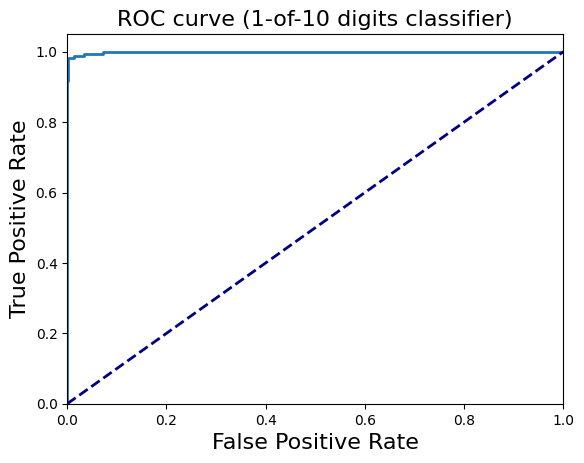

----------
Train accuracy : 1.0 ,Train recall : 1.0 ,Train F1 : 1.0
Test accuracy : 0.9760225669957687 ,Test recall : 0.9371069182389937  ,Test F1 : 0.946031746031746
----------
confusion_matrix : DecisionTreeClassifier(max_depth=7)
            Not one     One 
    Not one   543.0     7.0 
        One    10.0   149.0 




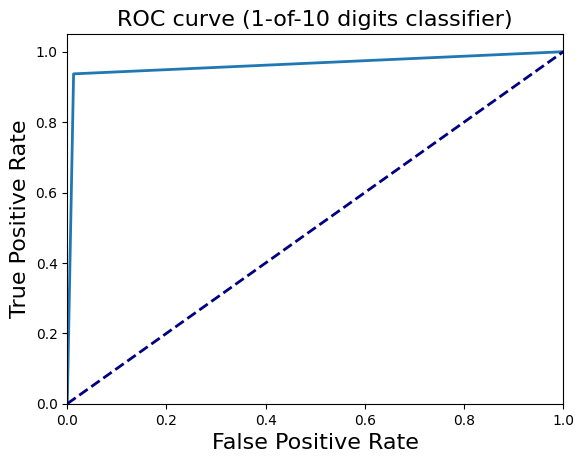

----------
Train accuracy : 1.0 ,Train recall : 1.0 ,Train F1 : 1.0
Test accuracy : 0.9929478138222849 ,Test recall : 0.9811320754716981  ,Test F1 : 0.9842271293375394
----------
confusion_matrix : GradientBoostingClassifier(n_estimators=210)
            Not one     One 
    Not one   548.0     2.0 
        One     3.0   156.0 




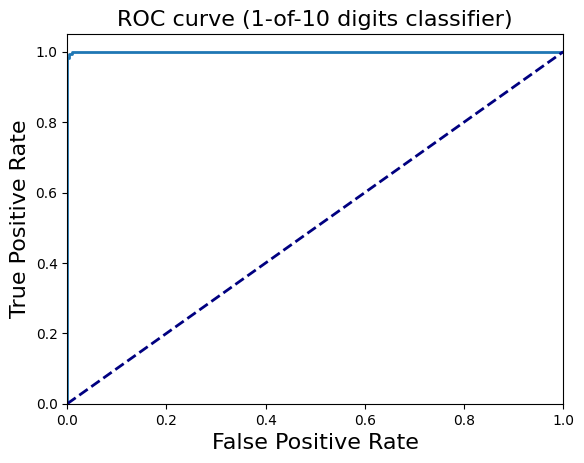

In [ ]:
for model_name in class_models.keys():
  fitted_model = class_models[model_name]['model'].fit(X_train, y_train)
  y_train_pred = fitted_model.predict(X_train)
  y_test_pred = fitted_model.predict(X_test)
  print(evaluate_model_class(fitted_model ,X_train ,X_test ,y_train ,y_test)[0])
  confusion = confusion_matrix(y_test, y_test_pred) # two parameters : one column : y, one column : predicted_y
  print('confusion_matrix :',class_models[model_name]['model'])
  print_cm(confusion, ['Not one', 'One'])
  print('\n')
  fpr_lr, tpr_lr, _ = roc_curve(y_test, class_models[model_name]['model'].predict_proba(X_test)[::,1])
  roc_auc_lr = auc(fpr_lr, tpr_lr) # area under curve
  plt.figure()
  plt.xlim([0.0, 1.00])
  plt.ylim([0.0, 1.05])
  plt.plot(fpr_lr, tpr_lr, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.show()
